In [22]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np 

In [23]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Image Filtering

In [24]:
# import shutil
# def move_images_with_underscore(src_folder, dest_folder):
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)

#     # Get the list of filenames in the source folder
#     filenames = os.listdir(src_folder)

#     for filename in filenames:
#         src_path = os.path.join(src_folder, filename)

#         # Check if the filename contains an underscore
#         if '_' in filename:
#             dest_path = os.path.join(dest_folder, filename)

#             # Move the file to the img_filtered folder
#             shutil.move(src_path, dest_path)
#             print(f"Moved: {filename}")

# path_to_images_folder = "img_raw"
# img_filtered_folder = "img_filtered"

# move_images_with_underscore(path_to_images_folder, img_filtered_folder)

In [47]:
image_dataset = pd.read_csv('fruitfly_annotationfile.csv')


labels = image_dataset['genus'].unique()
print(labels)
image_dataset.head()

['Austrotephritis' 'Bactrocera' 'Ceratitis' 'Procecidochares' 'Sphenella'
 'Trupanea' 'Urophora']


,file,country,genus,species,fullName,fullName2,fullName3,accesionNumber,view,project
0,NZAC04231968_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231968,wing,B3
1,NZAC04231969_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231969,wing,B3
2,NZAC04231970_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231970,wing,B3
3,NZAC04231972_Austrotephritis_cassiniae_wing_ve...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231972,wing,B3
4,NZAC04231981_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231981,wing,B3


In [26]:
import cv2
import imghdr
img_dir = 'img_raw'
img_exts = ['jpeg', 'jpg', 'png', 'bmp']

for wing_image in os.listdir(img_dir):
    img_path = os.path.join(img_dir, wing_image)
    try:
        img =cv2.imread(img_path)
        tip = imghdr.what(img_path)
        # print(tip)
        if tip not in img_exts:
            img = cv2.imread(img_path)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.plot(rgb_img)
            plt.show() 
            print("Image not in extension list {}".format(img_path))
            # os.remove(img_path)
    except Exception as e: 
        print("Issue with image {}".format(img_path))
        # os.remove(img_path)

In [48]:
import shutil

filtered_folder = 'img_filtered'
raw_folder = 'img_raw'
if not os.path.exists(filtered_folder):
        os.makedirs(filtered_folder)
for idxex, row in image_dataset.iterrows():
        label = row['genus']
        filename = row['file']
        source = os.path.join(raw_folder, filename)
        destination = os.path.join(filtered_folder, label)
        if not os.path.exists(destination):
                os.makedirs(destination)
        shutil.copy(source, destination)
        print(f'Moved: {filename} to {destination}')
    
    





Moved: NZAC04231968_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231969_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231970_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231972_Austrotephritis_cassiniae_wing_ventral_rightt.jpg to img_filtered\Austrotephritis
Moved: NZAC04231981_Austrotephritis_cassiniae_wing_dorsal_right.jpg to img_filtered\Austrotephritis
Moved: NZAC04231984_Austrotephritis_cassiniae_wing_dorsal_rightt.jpg to img_filtered\Austrotephritis
Moved: NZAC04231985_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231987_Austrotephritis_cassiniae_wing_dorsal_right.jpg to img_filtered\Austrotephritis
Moved: NZAC04231992_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231993_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Mov

In [74]:
# tf.keras.utils.image_dataset_from_directory??

In [52]:
import keras

data = tf.keras.utils.image_dataset_from_directory('img_filtered')
data_iterator = data.as_numpy_iterator()

Found 870 files belonging to 7 classes.


In [81]:
batch = data_iterator.next()

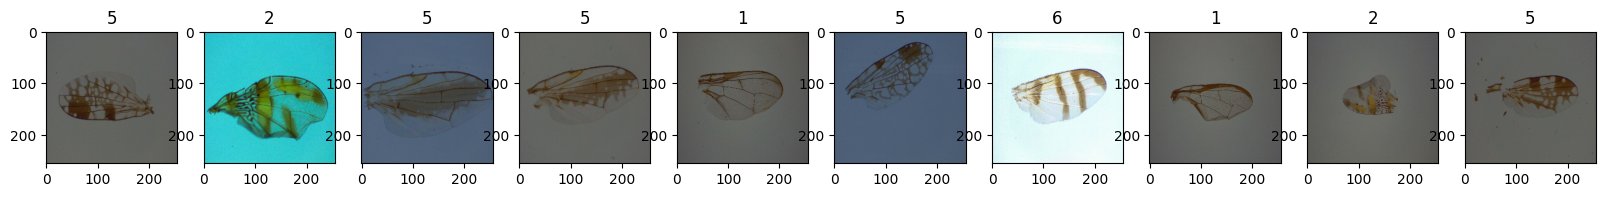

In [83]:
fig, ax= plt.subplots(ncols = 10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

wing_labels = {0:'Austrotephritis' ,1:'Bactrocera',2:'Ceratitis', 3:'Procecidochares', 4:'Sphenella', 5:'Trupanea',6:'Urophora' }

# Preprocessing Data

### Scaling Pixel values


In [88]:
data = data.map(lambda x,y : (x/255,y))

In [101]:
filtered_pipeline = data.as_numpy_iterator().next()

### Splitting data

In [111]:
train_size = int(len(data) * 0.7) #19
val_size = int(len(data) * 0.2)  + 1# 5 + 1
test_size = int(len(data) * 0.1) + 1 #2 + 1

In [115]:
#check if we are using all the data
len(data) ==train_size + val_size + test_size 

True

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)